# **Lab3 : Photo Mosaic using KNN Clustering**

In [12]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

from sklearn.cluster import KMeans

from scipy import spatial

from tqdm import tqdm
import cv2
import os 
import random

## Feature Preparation for tile images

Locate the directory containing your tile images dataset. Ensure that the images in this directory have a wide range of colors to create a visually appealing mosaic. List all the image filenames in the directory to `fnames`. ***Select a subset of these filenames to use as tile images, with at least 100 images in total, and assign them to `fnames_mini`.***

In [13]:
'''
import requests
import os

# Define the base API endpoint
base_url = 'https://picsum.photos/v2/list'

# Define the pages and limit
pages = [1, 2, 3, 4]  # List of pages to fetch
limit = 100     # Number of images per page

# Create a directory to store downloaded images
output_dir = 'picsum_images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Initialize a list to store all image data
all_images = []

# Fetch images from each page
for page in pages:
    # Construct the URL for the current page
    url = f'{base_url}?page={page}&limit={limit}'
    
    # Send a GET request to the API endpoint
    response = requests.get(url)
    
    if response.status_code == 200:
        # Parse JSON response
        data = response.json()
        # Append data to the list
        all_images.extend(data)
        print(f'Fetched page {page} with {len(data)} images.')
    else:
        print(f'Failed to fetch page {page}: {response.status_code}')

# Download each image from the list
for photo in all_images:
    img_url = photo['download_url']
    img_id = photo['id']
    
    try:
        # Get the image data
        img_data = requests.get(img_url)
        
        # Check if the request was successful
        if img_data.status_code == 200:
            # Save the image to a file
            img_filename = os.path.join(output_dir, f'{img_id}.jpg')
            with open(img_filename, 'wb') as img_file:
                img_file.write(img_data.content)
        else:
            print(f'Failed to download image {img_id}: {img_data.status_code}')
    except Exception as e:
        print(f'Error downloading image {img_id}: {e}')

print(f'Download Successful!')
'''

"\nimport requests\nimport os\n\n# Define the base API endpoint\nbase_url = 'https://picsum.photos/v2/list'\n\n# Define the pages and limit\npages = [1, 2, 3, 4]  # List of pages to fetch\nlimit = 100     # Number of images per page\n\n# Create a directory to store downloaded images\noutput_dir = 'picsum_images'\nif not os.path.exists(output_dir):\n    os.makedirs(output_dir)\n\n# Initialize a list to store all image data\nall_images = []\n\n# Fetch images from each page\nfor page in pages:\n    # Construct the URL for the current page\n    url = f'{base_url}?page={page}&limit={limit}'\n    \n    # Send a GET request to the API endpoint\n    response = requests.get(url)\n    \n    if response.status_code == 200:\n        # Parse JSON response\n        data = response.json()\n        # Append data to the list\n        all_images.extend(data)\n        print(f'Fetched page {page} with {len(data)} images.')\n    else:\n        print(f'Failed to fetch page {page}: {response.status_code}')\n

In [14]:
### START CODE HERE ###
tiles_directory = './picsum_images'

# List all image filenames in the directory
fnames = os.listdir(tiles_directory)

# Ensure that only image files are included (optional)
fnames = [fname for fname in fnames if fname.lower().endswith(('.png', '.jpg', '.jpeg'))]

numImg = len(fnames)

fnames_mini = random.sample(fnames, numImg)
print(numImg)
### END CODE HERE ###

400


In [15]:
assert len(fnames_mini) >= 100, "Less than 100 images found in the subset. Ensure the directory has at least 100 images."

### Loading and Resizing Tile Images
Define the size to which all tile images will be resized. This ensures consistency in the dimensions of the tile images. 
Iterate over the list of tile image filenames. Resize the image to the predefined `tile_size`. Append the processed image to the list of `tiles`.


In [16]:
### START CODE HERE ###
tiles = []

tile_size = (10, 10)

for fname in fnames_mini:
    try:
        # Read the image file using OpenCV
        img = cv2.imread(f"{tiles_directory}/{fname}")
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        if img_rgb is None:
            print(f'Error: Could not read {fname}')
            continue
        
        # Resize the image to the predefined tile size
        img_resized = cv2.resize(img_rgb, tile_size, interpolation=cv2.INTER_AREA) # cv2.INTER_AREA resamples the image using pixel area relation. It calculates the average of pixel values within the pixel areas being reduced
        
        # Append the resized image to the list of tiles
        tiles.append(img_resized)
    except Exception as e:
        print(f'Error processing {fname}: {e}')

# print(tiles)
### END CODE HERE ###

In [17]:
assert len(tiles) == len(fnames_mini), "The number of processed images does not match the number of filenames. Ensure all images are loaded and processed correctly."

Randomly select a few tile images from your dataset and display them using Matplotlib. This will help you visually inspect the tile images to ensure they are loaded and processed correctly.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/image_processing-2024/master/Lab3_Image-Clustering/asset/1.png)
</details>

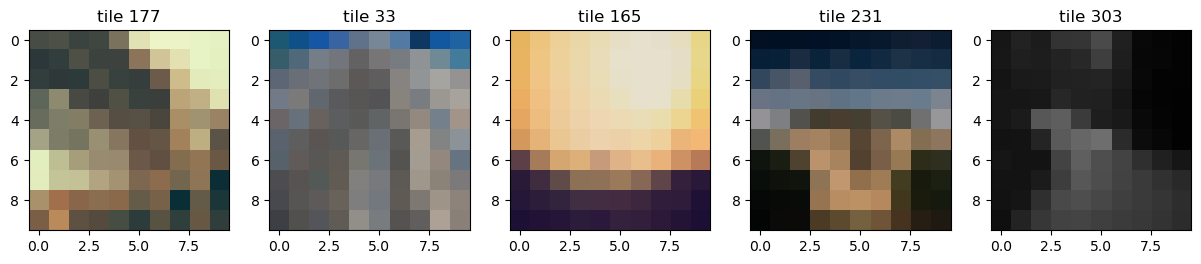

In [18]:
### START CODE HERE ###
num_images_to_display = 5
indices = random.sample(range(len(tiles)), num_images_to_display)

# Retrieve the images corresponding to the selected indices
selected_images = [tiles[i] for i in indices]

fig, axs = plt.subplots(1, num_images_to_display, figsize=(15, 5))

for i in range(num_images_to_display):
    axs[i].imshow(selected_images[i])
    axs[i].set_title(f'tile {indices[i]}')

plt.show()
### END CODE HERE ###

Calculate the average color for each tile image and add the resulting mean color to the `colors` list.

In [19]:
### START CODE HERE ###
colors = []
mean_color_each_tile = [np.mean(tile, axis=(0, 1)) for tile in tiles]
colors = np.array(mean_color_each_tile)

print("Sample mean colors:", colors[:5])
### END CODE HERE ###    

Sample mean colors: [[161.31 155.84 144.13]
 [122.56 122.56 122.56]
 [129.58 120.38 107.52]
 [ 71.17 101.97  83.95]
 [198.22 192.35 177.19]]


Create a visual representation of the mean colors calculated for each tile image. 
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical
- Example output where `numImg = 10`

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/image_processing-2024/master/Lab3_Image-Clustering/asset/2-1.png)

- Example output where `numImg = 500`

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/image_processing-2024/master/Lab3_Image-Clustering/asset/2-2.png)
</details>

In [20]:
def visualize_mean_colors(colors, numImg):
    colors_array = np.array(colors)
    
    if numImg > len(colors_array):
        numImg = len(colors_array)

    # Create a figure to display the colors
    fig, ax = plt.subplots(figsize=(25, 2))  # Adjust figsize based on numImg

    # Create an array to represent colors as rectangles
    color_representation = np.zeros((1, numImg, 3), dtype=np.uint8)
    
    # Fill the color representation array
    color_representation[0] = colors_array[:numImg]

    # Display the color representation
    ax.imshow(color_representation, aspect='auto')

    # Set title and show plot
    plt.title(f'Mean Colors for numImg = {numImg}')
    plt.show()

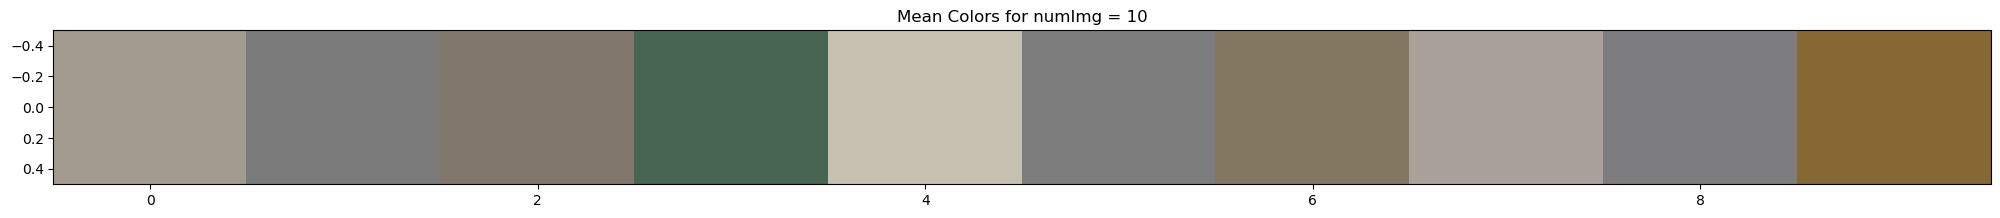

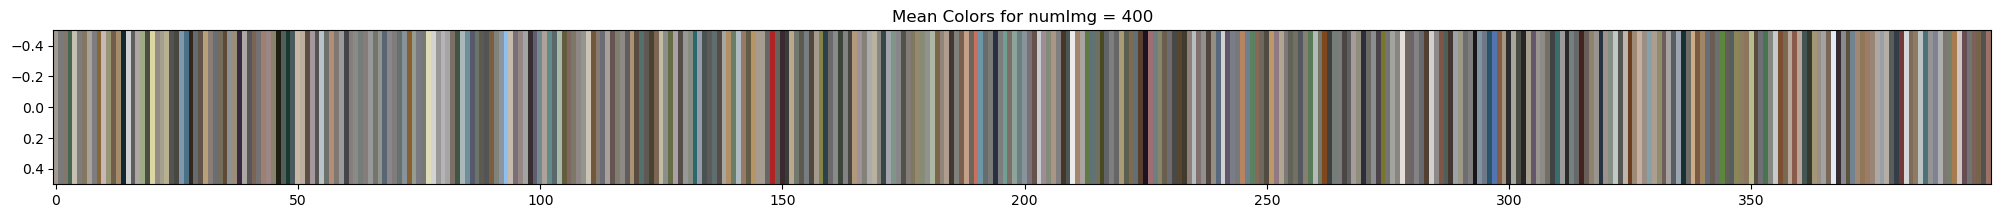

In [21]:
### START CODE HERE ###
numImg_example = [10, len(tiles)]
for num in numImg_example:
    # Visualize the example colors
    visualize_mean_colors(colors, num)
### END CODE HERE ###

## Preparation for main image

Load the main image.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/image_processing-2024/master/Lab3_Image-Clustering/asset/3.png)

</details>

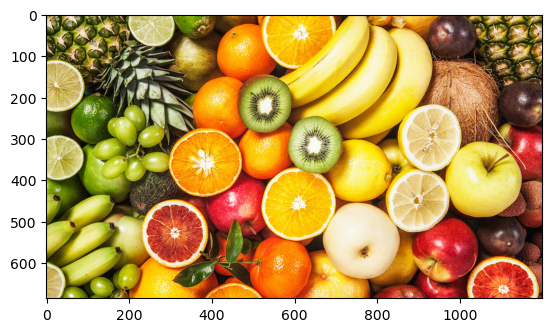

In [22]:
### START CODE HERE ###
og_img = cv2.imread('images/fruit3.jpg')
og_img = cv2.cvtColor(og_img, cv2.COLOR_BGR2RGB)
main_img = og_img.copy()
plt.imshow(main_img)
plt.show()
### END CODE HERE ###

Compute the number of tiles required in the height and width dimensions of the image. This is based on the size of each tile and the dimensions of the original image. Define the dimensions for the resized image grid.

In [23]:
class Mosaic:
    def __init__(self, og_img, main_img, tiles):
        self.tiles = tiles
        self.og_img = og_img
        self.main_img = main_img
        self.tiles = tiles
        self.colors = None
        self.img_mean_colors = np.zeros((self.get_main_img_size()[0], self.get_main_img_size()[1], 3), dtype=np.float32)
        self.tree = None
        self.closest_tiles = np.zeros(self.get_main_img_size(), dtype=int) #เก็บตำแหน่ง index ของภาไที่มี average ใกล้กับจุดนั้นๆ
        self.mosaic_img = np.zeros((self.get_og_img_size()[0], self.get_og_img_size()[1], 3), dtype=np.uint8) 

    def get_og_img_size(self):
        og_height, og_width, _ = self.og_img.shape
        return (og_height, og_width)

    def get_main_img_size(self):
        num_tiles_y = int(self.get_og_img_size()[0] // self.get_tiles_size()[0])
        num_tiles_x = int(self.get_og_img_size()[1] // self.get_tiles_size()[1])
        return (num_tiles_y, num_tiles_x)
    
    def get_tiles_size(self):
        tile_height, tile_width, _ = self.tiles[0].shape
        return (tile_height, tile_width)

    def get_tiles(self):
        return self.tiles

    def get_og_img(self):
        return self.og_img

    def get_main_img(self):
        return self.main_img

    def get_colors(self):
        return self.colors

    def get_img_mean_colors(self):
        return self.get_img_mean_colors

    def get_tree(self):
        return self.tree

    def get_closest_tiles(self):
        return self.closest_tiles

    def get_mosaic_img(self):
        return self.mosaic_img

    def create_tiles_mean_colors(self):
        mean_color_each_tile = [self.compute_mean_color(tile) for tile in tiles]
        self.colors = np.array(mean_color_each_tile)

    def compute_mean_color(self, img):
        return np.mean(img, axis=(0, 1))

    def create_KDTree(self):
        self.create_tiles_mean_colors()
        # Build KD-Tree from mean colors of tiles
        self.tree = spatial.KDTree(self.colors)

    def create_closest_tiles_with_k(self, k):
        # Initialize the closest_tiles matrix
        self.create_KDTree()
        channels = cv2.split(self.og_img)
        # Convert image to the same format as mean colors (flattened)
        self.img_mean_colors = np.zeros((self.get_main_img_size()[0], self.get_main_img_size()[1], len(channels)), dtype=np.float32)
        self.closest_tiles = np.zeros(self.get_main_img_size(), dtype=int)
        for i in range(self.get_main_img_size()[0]):
            for j in range(self.get_main_img_size()[1]):
                # Extract the current tile region from the image and compute its mean color
                tile_region = self.og_img[i * self.get_tiles_size()[0]:(i + 1) * self.get_tiles_size()[0], j * self.get_tiles_size()[1]:(j + 1) * self.get_tiles_size()[1]]
                self.img_mean_colors[i, j] = self.compute_mean_color(tile_region)

                # Query the KD-Tree to find the closest tiles by mean color
                distances, indices = self.tree.query(self.img_mean_colors[i, j], k = k)

                if k == 1:
                    # For k=1, directly assign the closest tile index
                    self.closest_tiles[i, j] = indices
                else:
                    # For k>1, perform voting to choose the most frequent tile index
                    # Count occurrences of each index
                    if i==1 and j==1:
                        print(len(indices))
                    vote_counts = np.bincount(indices)
                    most_common_index = np.argmax(vote_counts)
                    self.closest_tiles[i, j] = most_common_index

    def draw_mosaic(self, k):
        self.create_closest_tiles_with_k(k=k)
        self.mosaic_img = np.zeros((self.get_og_img_size()[0], self.get_og_img_size()[1], 3), dtype=np.uint8) 
        for i in range(self.get_main_img_size()[0]):
            for j in range(self.get_main_img_size()[1]):
                x,y = j * self.get_tiles_size()[1], i * self.get_tiles_size()[0]
                # Index of tile
                index = self.closest_tiles[i, j]
                # Draw tile
                self.mosaic_img[y:y + self.get_tiles_size()[0], x:x + self.get_tiles_size()[1], :] = self.tiles[index]
        return self.mosaic_img, self.closest_tiles
        

In [24]:
### START CODE HERE ###
mosaic = Mosaic(og_img, main_img, tiles)

print(f"Original Image Dimensions: Height = {mosaic.get_og_img_size()[0]}, Width = {mosaic.get_og_img_size()[1]}")
print(f"Tile Size: {mosaic.get_tiles_size()}")
print(f"Main Image Dimensions: Height = {mosaic.get_main_img_size()[0]}, Width = {mosaic.get_main_img_size()[1]}")

### END CODE HERE ###

Original Image Dimensions: Height = 686, Width = 1200
Tile Size: (10, 10)
Main Image Dimensions: Height = 68, Width = 120


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/image_processing-2024/master/Lab3_Image-Clustering/asset/4.png)

</details>

(68, 120, 3)


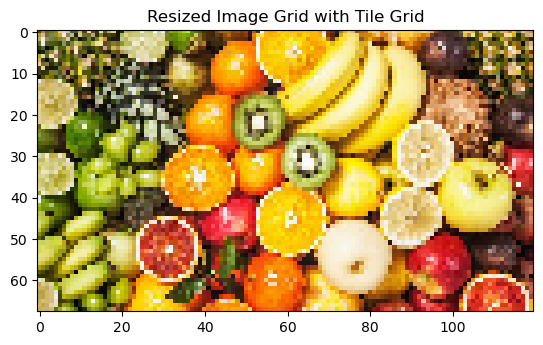

In [25]:
### START CODE HERE ###
main_img = cv2.resize(og_img, (mosaic.get_main_img_size()[1], mosaic.get_main_img_size()[0]), interpolation=cv2.INTER_NEAREST) #This means that the value of each pixel in the resized image is taken from the closest pixel in the original image without any smoothing or blending.
print(main_img.shape)
plt.imshow(main_img)
plt.title('Resized Image Grid with Tile Grid')
plt.show()
### END CODE HERE ###

Create a KDTree from the list of mean colors of the tile images using [`spatial.KDTree()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.html). Use `closest_tiles` to store the index of the closest tile image for each pixel in the resized main image.
***Try with difference value of k in `tree.query()`***

In [26]:
_, closest_tiles = mosaic.draw_mosaic(k=1)
print(closest_tiles.shape)

(68, 120)


In [27]:
assert closest_tiles.shape == mosaic.get_closest_tiles().shape, "The shape of the closest_tiles array does not match the expected dimensions."

Visualizing `closest_tiles` Indices
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/image_processing-2024/master/Lab3_Image-Clustering/asset/5.png)

</details>

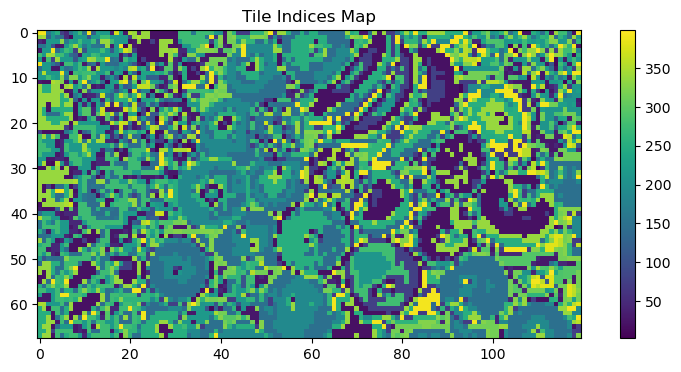

In [28]:
### START CODE HERE ###
plt.figure(figsize=(10, 4))
plt.imshow(closest_tiles)
plt.colorbar()
plt.title('Tile Indices Map')
plt.axis('on')
plt.show()
### END CODE HERE ###

Create a copy of the resized main image and replace each pixel region with the corresponding tile image based on the closest tile indices to assemble the final photo mosaic.

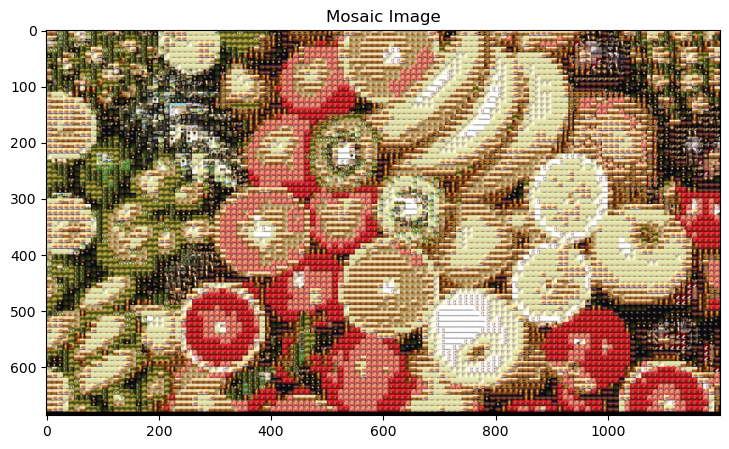

In [29]:
### START CODE HERE ###
mosaic_img,_ = mosaic.draw_mosaic(k=1)

# Display the mosaic
plt.figure(figsize=(10, 5))
plt.imshow(mosaic_img)
plt.title('Mosaic Image')
plt.show()
### END CODE HERE ###

Create a side-by-side comparison of four images: the original image, the resized main image, the final mosaic, and the KDTree tile index grid. This helps visualize the mosaic creation process.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/image_processing-2024/master/Lab3_Image-Clustering/asset/6.png)

</details>

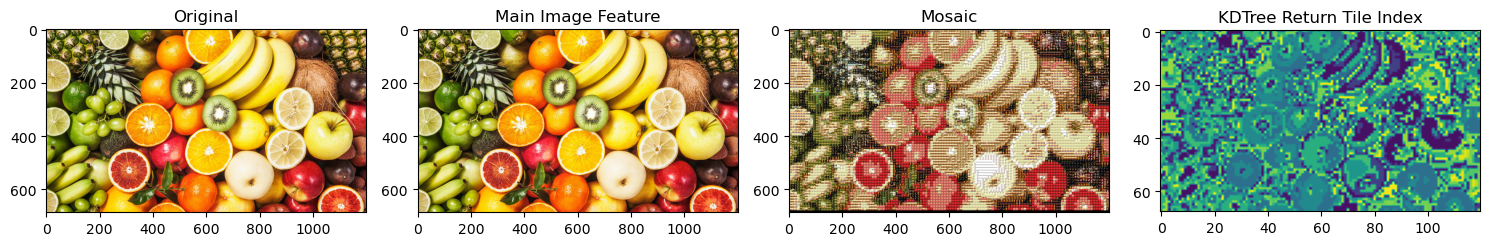

In [30]:
### START CODE HERE ###

fig, axs = plt.subplots(1, 4, figsize=(15, 5))

axs[0].imshow(mosaic.og_img)
axs[0].set_title('Original')

axs[1].imshow(mosaic.main_img)
axs[1].set_title('Main Image Feature')

axs[2].imshow(mosaic_img)
axs[2].set_title('Mosaic')

axs[3].imshow(closest_tiles)
axs[3].set_title('KDTree Return Tile Index')

plt.tight_layout()
plt.show()
### END CODE HERE ###

## Save the final photo mosaic 
Experiment with at least 3 different values of k and save the final photo.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- Saved output should resemble this, but not be identical

![image.gif](https://github.com/Digital-Image-Processing-Laboratory/image_processing-2024/blob/master/Lab3_Image-Clustering/asset/7.gif?raw=true)


- k = 1

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/image_processing-2024/master/Lab3_Image-Clustering/asset/output-k1.png)

- k = 10

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/image_processing-2024/master/Lab3_Image-Clustering/asset/output-k10.png)

- k = 50

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/image_processing-2024/master/Lab3_Image-Clustering/asset/output-k50.png)
</details>

In [31]:
output_folder = "output"
os.makedirs(output_folder, exist_ok=True)

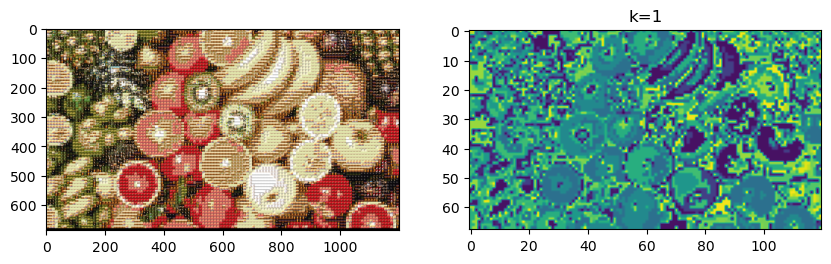

10


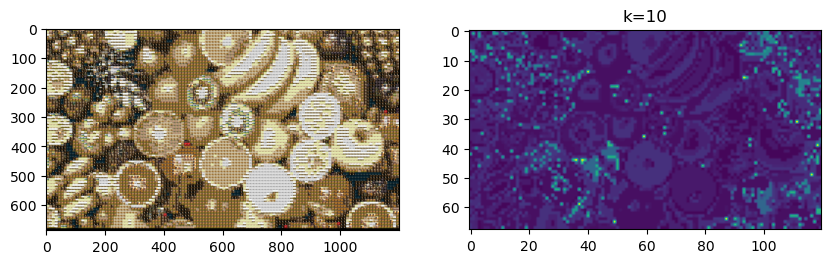

50


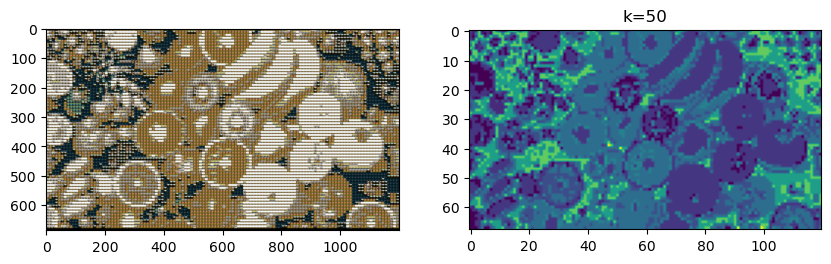

In [32]:

### START CODE HERE ###
k_list = [1, 10, 50]
for i in k_list:
    mosaic_img_ki, closest_tiles_ki = mosaic.draw_mosaic(k=i)

    output_file = os.path.join(output_folder, f"mosaic_k{i}.jpg")
    cv2.imwrite(output_file, cv2.cvtColor(mosaic_img_ki, cv2.COLOR_RGB2BGR))

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(mosaic_img_ki)
    axs[1].imshow(closest_tiles_ki)
    plt.title(f'k={i}')
    plt.show()
### END CODE HERE ###

---

## **Question** 
1. How does changing the size of the tiles influence the overall quality and appearance of the mosaic? Conduct an analysis comparing two different tile sizes and discuss the trade-offs involved in terms of computational complexity and visual fidelity.
2. Explain the effect of changing the value of K (number of nearest neighbors) on the mosaic image.

1.  <b>ขนาดไทล์เล็ก:</b>

    - รายละเอียดสูง: สามารถเก็บรายละเอียดของภาพต้นฉบับได้มาก ทำให้ภาพโมเสคดูเหมือนภาพต้นฉบับมากที่สุด
    - คำนวณนาน: เนื่องจากมีไทล์จำนวนมาก ทำให้กระบวนการหาสีและเรียงต่อภาพใช้เวลานาน
    - อาจเกิดสัญญาณรบกวน: หากไทล์เล็กมากเกินไป อาจทำให้ภาพโมเสคมีลักษณะเป็นเม็ดๆ หรือสัญญาณรบกวน

    <b>ขนาดไทล์ใหญ่:</b>
    - รายละเอียดน้อย: ภาพโมเสคจะดูเป็นภาพกว้างๆ หรือภาพวาดมากกว่าภาพถ่าย
    - คำนวณเร็ว: เนื่องจากมีไทล์จำนวนน้อย ทำให้กระบวนการคำนวณเร็วขึ้น
    - อาจเกิดขอบที่ชัดเจน: หากไทล์ใหญ่เกินไป อาจทำให้ภาพโมเสคมีขอบของแต่ละไทล์ที่เห็นได้ชัด<br/>
    <br/>
    
2.  <b>ค่า K ต่ำ (เช่น K=1):</b>
    - รายละเอียดสูง: ภาพโมเสคจะเก็บรายละเอียดของภาพต้นฉบับได้ดี เนื่องจากแต่ละไทล์จะถูกแทนที่ด้วยไทล์ที่คล้ายกันที่สุดเพียงตัวเดียว
    - เสียงรบกวนสูง: อาจเกิดเสียงรบกวนหรือจุดที่ไม่ต่อเนื่องได้ง่าย เนื่องจากการพิจารณาเพียงไทล์เดียวอาจทำให้เกิดการเลือกไทล์ที่ไม่เหมาะสมในบางกรณี
    - ไวต่อสัญญาณรบกวน: ภาพโมเสคอาจได้รับผลกระทบจากสัญญาณรบกวนในภาพต้นฉบับได้ง่าย

    <b>ค่า K สูง:</b>
    - รายละเอียดต่ำ: ภาพโมเสคจะดูเรียบเนียนและทั่วไป เนื่องจากการพิจารณาไทล์หลายตัวจะทำให้รายละเอียดปลีกย่อยหายไป
    - เสถียรภาพสูง: ภาพโมเสคจะมีความเสถียรและไม่ไวต่อสัญญาณรบกวน เนื่องจากการตัดสินใจจะขึ้นอยู่กับไทล์หลายตัว
    - อาจสูญเสียรายละเอียด: หากค่า K สูงเกินไป อาจทำให้ภาพโมเสคสูญเสียรายละเอียดที่สำคัญไป